In [20]:
%load_ext autoreload
%autoreload 2

import sys
import math
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

import scikitplot as skplt

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x)) #Limiting floats output to 3 decimal points
pd.options.display.max_rows = 1000

sys.path.insert(0, "/Users/user/git/datasci")
import sci.plots as scip
import sci.learn as scil


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Basics

In [77]:
data = scil.load_data("processed_min", random_state=random_state)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear') # LB 0.848
model_lr = model

scoring = 'roc_auc'


(250, 300) (250,)


## Cross Validation Splitters

In [9]:
from mlxtend.evaluate import BootstrapOutOfBag, RandomHoldoutSplit
from sklearn.model_selection import *

# format
# cv_{total_splits}_{train/test-fold}

# a single split with a given ratio, for when we want to use a quick CV (Grid-search, bayes-search) with a single split and need a cv object
cv_1_10 = RandomHoldoutSplit(valid_size=0.1, stratify=True, random_seed=0)

# bootstrap from X len(X) samples (sample with repetition)
# the rest will go to test set. This always give a test set size of about ~1/3
cv_200_3 = BootstrapOutOfBag(200) # always has a mean test_size of ~33%, which can lead tp under-estimation of CV score on small data-sets


# both of these allow to control the test set size AND the number of CV splits independently
# in "dont-overfit-ii" dataset, RepeatedStratifiedKFold seems to be more stable
# with a total of 100 splits (n_splits=20, n_repeats=5 for RepeatedStratifiedKFold) we get reasonable stabiltiy for both
# with a total of 1000 splits we get very good stabiltiy
cv_1000_10 = RepeatedStratifiedKFold(n_splits=10, n_repeats=100)
cv_1000_10 = StratifiedShuffleSplit(n_splits=1000, test_size=0.1)


In [10]:
def analyze_cv(data, model, cvs_set, columns):
    cvs_results = {}
    for name, cvs in cvs_set.items():
        scores = []
        for cv in cvs:
            try:
                cv_scores = scil.score_cv(data, model, scoring, cv=cv, show=False).iloc[:, 0]
            except:
                cv_scores = np.zeros(cv.get_n_splits())
                cv_scores[:] = np.nan
            scores.append(cv_scores)
        cvs_results[name] = scores

    for name, scores in cvs_results.items():
        df = pd.DataFrame(scores).T
        df.columns = columns
        cvs_results[name] = df
    
    return cvs_results
    

### total_splits effect

In [18]:
resolution = 50
test_size = 0.1
total_splits = [int(n) for n in np.geomspace(10, 10000, resolution)]
cvs_set = {
    f'StratifiedShuffleSplit  | test_size={test_size}': [StratifiedShuffleSplit(n, test_size=test_size) for n in total_splits],
    f'RepeatedStratifiedKFold | test_size={test_size}': [RepeatedStratifiedKFold(int(1/test_size), int(math.ceil(n * test_size))) for n in total_splits],
}

cvs_results_total_splits = analyze_cv(data, model, cvs_set, total_splits)


CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for Logisti

name: 	StratifiedShuffleSplit  | test_size=0.1	mean:	0.7970065730131499	std:	0.08625922035011625
name: 	RepeatedStratifiedKFold | test_size=0.1	mean:	0.7976676649614255	std:	0.08487453088507309


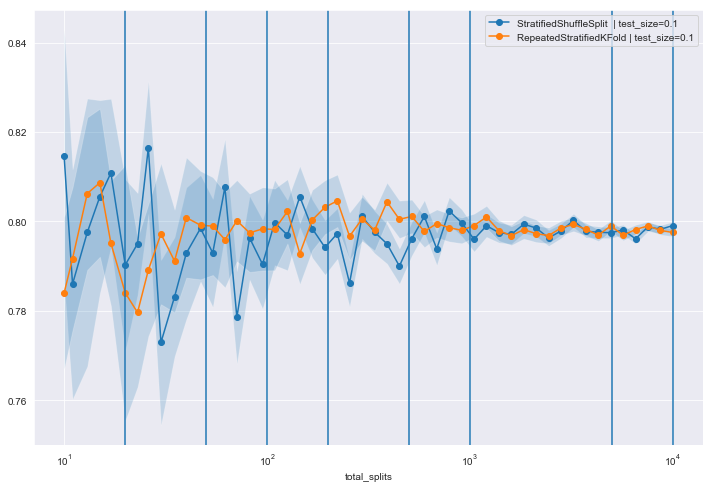

In [29]:
plt.figure(figsize=(12, 8))
for name, df in cvs_results_total_splits.items():
    scip.range(df, name=name)
plt.legend()
plt.xscale("log")
plt.xlabel("total_splits")

plt.axvline(20)
plt.axvline(50)
plt.axvline(100)
plt.axvline(200)
plt.axvline(500)
plt.axvline(1000)  # we get good stabiltiy in 1000 total_splits
plt.axvline(5000)
plt.axvline(10000)


### test_sizes effect

In [30]:
total_split = 1000
test_sizes = np.linspace(0.01, 0.5, resolution)
cvs_set = {
    f'StratifiedShuffleSplit  | total_split={total_split}': [StratifiedShuffleSplit(n_splits=total_split, test_size=test_size) for test_size in test_sizes],
    f'RepeatedStratifiedKFold | total_split={total_split}': [RepeatedStratifiedKFold(n_splits=int(1/test_size), n_repeats=int(math.ceil(total_split * test_size))) for test_size in test_sizes],
}
cvs_results_test_sizes = analyze_cv(data, model, cvs_set, test_sizes)


CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for LogisticRegression ..
CV for Logisti

name: 	StratifiedShuffleSplit  | total_split=1000	mean:	0.7795553588373946	std:	0.06945577352133385
name: 	RepeatedStratifiedKFold | total_split=1000	mean:	0.7722615817777093	std:	0.06468659987529217


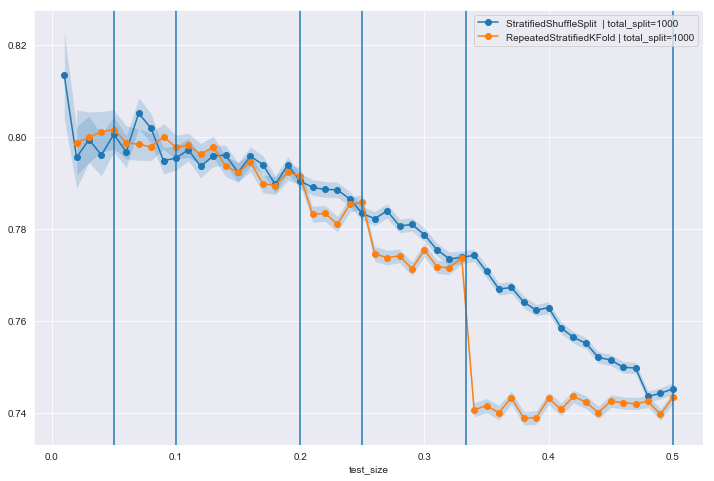

In [32]:
plt.figure(figsize=(12, 8))
for name, df in cvs_results_test_sizes.items():
    scip.range(df, name=name)
plt.legend()
plt.xlabel("test_size")

# the drops in RepeatedStratifiedKFold are where the test_size rounds to 2, 3, 4, 5 integers
# StratifiedShuffleSplit allows for a smooth choise of test_size if needed, but for smaller values makes little difference
plt.axvline(1/2)
plt.axvline(1/3)
plt.axvline(1/4)
plt.axvline(1/5)  # cv=3 and cv=5 are popular choice, but they hurt the cv-score on small datasets
plt.axvline(1/10) # cv=10 is a good choice (test_size=0.1)
plt.axvline(1/20) # cv=20 (test_size=0.05) might lead to higer variabiltiy in the scores


In [313]:
def oob_loo_score(data, model, metric):
    cv = LeaveOneOut()
    y_pred_oob = np.zeros(data.y.shape[0])
    for train, test in cv.split(data.X, data.y):
        model.fit(data.X.iloc[train], data.y.iloc[train])
        y_pred_oob[test] = model.predict_proba(data.X.iloc[test])[:, 1]
        
    return metric(data.y, y_pred_oob)

In [316]:
oob_loo_score(data, model_lr_bagging_1, roc_auc_score)

0.8047222222222222

In [103]:
from mlxtend.evaluate import bootstrap_point632_score

# Model accuracy
scores = bootstrap_point632_score(model_lr, data.X.values, data.y.values, method='.632', scoring_func=metric)
print(f'score: {np.mean(scores):.4f}')
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.4f, %.4f]' % (lower, upper))

score: 0.7760
95% Confidence interval: [0.7182, 0.8334]


In [196]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

model_lr_bagging_1 = BaggingClassifier(model_lr, n_estimators=20, max_samples=0.95, bootstrap=False, n_jobs=-2, random_state=random_state) # LB 0.849
model_2 = LogisticRegression(n_jobs=10)
knn = KNeighborsClassifier(3)
model_lr_bagging_4 = BaggingClassifier(model_lr, n_estimators=258, max_samples=0.941283072066677, bootstrap=False, n_jobs=-2, random_state=random_state) # LB 0.848



In [157]:
scil.fit(data, model_lr)
scil.fit(data, model_lr_bagging_1)
scil.fit(data, model_2)
scil.fit(data, knn)


fitting LogisticRegression ..
fitting BaggingClassifier ..
fitting LogisticRegression ..
fitting KNeighborsClassifier ..


In [163]:
from mlxtend.evaluate import cochrans_q

preds = [model.predict(data.X_test) for model in [model_lr, model_2, model_lr_bagging_1, knn]]

In [164]:
cochrans_q(data.y_test.values, *preds)

(6.5049504950495045, 0.08946747302524331)

In [165]:
preds

[array([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.]),
 array([1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.]),
 array([0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.])]

In [128]:
data.y_test.values

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.])

paired_ttest_resampled [10]: 0.2636 +/- 0.6661 (2-std)
paired_ttest_kfold_cv_shuffle [10]: 0.4666 +/- 0.5300 (2-std)
paired_ttest_5x2cv [10]: 0.5262 +/- 0.6402 (2-std)
combined_ftest_5x2cv [10]: 0.4024 +/- 0.2858 (2-std)


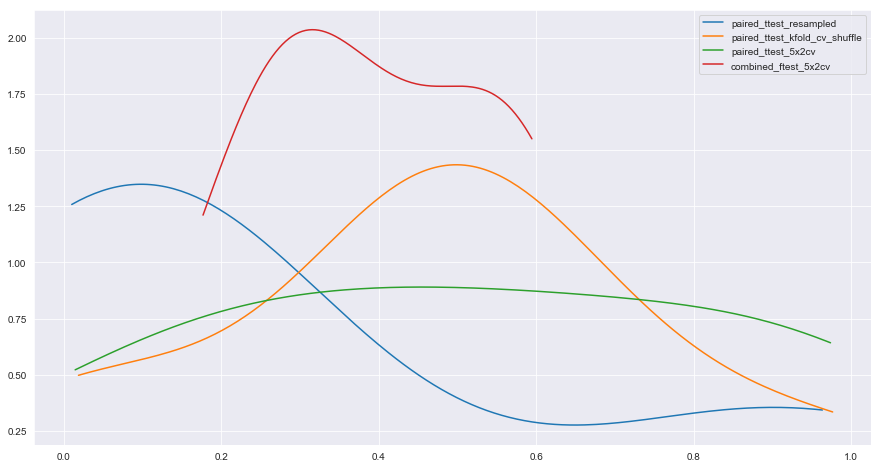

In [311]:
# READ:
# http://rasbt.github.io/mlxtend/user_guide/evaluate/combined_ftest_5x2cv/
# the suggested method is: combined_ftest_5x2cv

from mlxtend.evaluate import paired_ttest_resampled, paired_ttest_kfold_cv, combined_ftest_5x2cv, paired_ttest_5x2cv

model1 = model_lr
model2 = model_lr_bagging_1

# paired_ttest_resampled(model1, model2, data.X, data.y, scoring=scoring)
# paired_ttest_kfold_cv(model1, model2, data.X.values, data.y.values, scoring=scoring)
# paired_ttest_5x2cv(model1, model2, data.X.values, data.y.values, scoring=scoring)
# combined_ftest_5x2cv(model1, model2, data.X.values, data.y.values, scoring=scoring)


# make a shuffled version of paired_ttest_kfold_cv to get variance in results
from functools import partial
paired_ttest_kfold_cv_shuffle = partial(paired_ttest_kfold_cv, shuffle=True)
paired_ttest_kfold_cv_shuffle.__name__ = 'paired_ttest_kfold_cv_shuffle'

funcs = [paired_ttest_resampled, paired_ttest_kfold_cv_shuffle, paired_ttest_5x2cv, combined_ftest_5x2cv]
res = {f.__name__: [f(model1, model2, data.X.values, data.y.values, scoring=scoring)[1] for _ in range(10)] for f in funcs}

# we plot the p-values of multiple iterations to see how they vary
import plots
plots.plotKde(res)


CV for LogisticRegression (0) ..
CV for BaggingClassifier (1) ..
LogisticRegression (0) [1000]: 0.8005 +/- 0.1726 (2-std)
BaggingClassifier (1) [1000]: 0.7997 +/- 0.1791 (2-std)


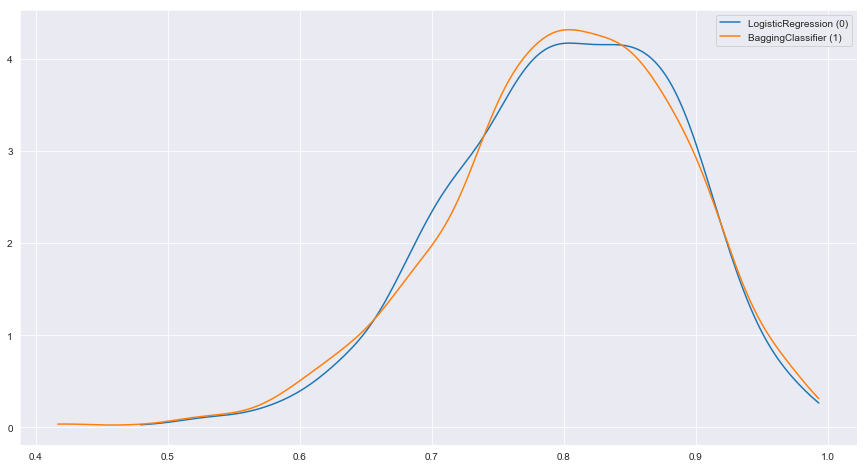

In [317]:
models = [model1, model_lr_bagging_1]
df = scil.score_cv(data, models, show=False, cv=cv_1000_10)


LogisticRegression (0) [1000]: 0.8005 +/- 0.1726 (2-std)
BaggingClassifier (1) [1000]: 0.7997 +/- 0.1791 (2-std)


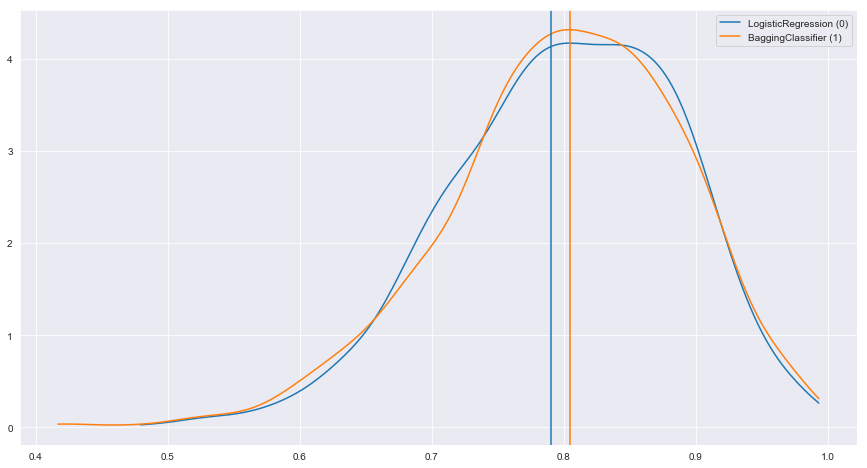

In [351]:
plot_items = plots.plotKde(df, return_plot_items=True)
for pi, model in zip(plot_items, models):
    plt.axvline(oob_loo_score(data, model, roc_auc_score), color=pi[0].get_color())

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


X, y = iris_data()
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25,
                     random_state=123)

score1 = clf1.fit(X_train, y_train).score(X_test, y_test)
score2 = clf2.fit(X_train, y_train).score(X_test, y_test)

print('Logistic regression accuracy: %.2f%%' % (score1*100))
print('Decision tree accuracy: %.2f%%' % (score2*100))

Logistic regression accuracy: 97.37%
Decision tree accuracy: 94.74%


In [178]:
from mlxtend.evaluate import paired_ttest_resampled


t, p = paired_ttest_resampled(estimator1=clf1,
                              estimator2=clf2,
                              X=X, y=y,
                              random_seed=3)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 0.523
p value: 0.605
